# Market research for poultry export projects

<a id='project'></a>
## Project Description

>The strategy of the company requires to expand the agribusiness specializes in chicken beyond our current field of operations.     
In order to help identifying potential countries candidates, an analysis is performed following this protocol:  
1. Collect various data assessing countries around the world and divide into 5 groups by clustering  
2. Characterise each group and select the countries we should target

<a id='data'></a>
## Data Cleaning


<a id='gather'></a>
### Gather, Assess, and Clean
<p>

4 types of data are used:   
1. Food balance data of poultry meats in each country (fbs_poultry_meat):  
   To understand the consumption and production situation of chicken in each country    
   Use the data in 2018
2. Total and Animal proteins and calories intake in each country (fbs_total_animal):  
   To study each country's diet, especially in terms of animal proteins and calories  
   Use the data in 2018
3. Population (pop):  
   Obtained two years' data (2016 and 2018) and calculate the growth rate over the past 2 years
   Similarly available from FAO's website  
   
Above 3 datasource are available from https://www.fao.org/faostat/en/#data/FBS   

4. Number of KFC restaurants in each country (kfc):  
   The presence of KFC restaurants means there is a definite demand for chicken, and it is expected to increase as the number of further restaurants grows.  
   Seems to be useful in analyzing our target, 2 years' data available (2016 and 2018)

In [1]:
# Package import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

# Import functions created for the book
from functions import *

Issues and Comments
- No missing values and duplicates in each dataset

Convert country name in kfc into country code using 'pycountry' to join food balance data

In [2]:
df_list = []
csvs = ['fbs_poultry_meat', 'fbs_total_animal', 'pop', 'kfc_2016','kfc_2018']
for idx, csv in enumerate(csvs):
    
    # create file location
    f = r'dataset/' + csv + '.csv'
    
    # read in csv
    df_in = pd.read_csv(f)
    
    # now display some statistics on each df
    display(df_in.head())
    display(df_in.describe(include='all'))
    display(df_in.info())
    print('# of duplicates found is \n', df_in[df_in.duplicated()].sum())
    
    # append the df to a list
    df_list.append(df_in)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,5511,Production,2734,Poultry Meat,2018,2018,1000 tonnes,29.00,Im,FAO data based on imputation methodology
1,FBS,Food Balances (2010-),2,Afghanistan,5611,Import Quantity,2734,Poultry Meat,2018,2018,1000 tonnes,25.00,Im,FAO data based on imputation methodology
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2734,Poultry Meat,2018,2018,kcal/capita/day,5.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2734,Poultry Meat,2018,2018,g/capita/day,0.51,Fc,Calculated data
4,FBS,Food Balances (2010-),2,Afghanistan,684,Fat supply quantity (g/capita/day),2734,Poultry Meat,2018,2018,g/capita/day,0.31,Fc,Calculated data


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,898,898,898.000000,898,898.000000,898,898.0,898,898.0,898.0,898,898.000000,898,898
unique,1,1,NaN,180,NaN,5,NaN,1,NaN,NaN,3,NaN,3,3
top,FBS,Food Balances (2010-),NaN,Afghanistan,NaN,Import Quantity,NaN,Poultry Meat,NaN,NaN,g/capita/day,NaN,Fc,Calculated data
freq,898,898,NaN,5,NaN,180,NaN,898,NaN,NaN,360,NaN,540,540
mean,NaN,NaN,128.709354,NaN,2622.380846,NaN,2734.0,NaN,2018.0,2018.0,NaN,203.193931,NaN,NaN
std,NaN,NaN,74.841498,NaN,2394.475933,NaN,0.0,NaN,0.0,0.0,NaN,1351.585570,NaN,NaN
min,NaN,NaN,1.000000,NaN,664.000000,NaN,2734.0,NaN,2018.0,2018.0,NaN,0.000000,NaN,NaN
25%,NaN,NaN,66.250000,NaN,674.000000,NaN,2734.0,NaN,2018.0,2018.0,NaN,3.840000,NaN,NaN
50%,NaN,NaN,123.500000,NaN,684.000000,NaN,2734.0,NaN,2018.0,2018.0,NaN,12.000000,NaN,NaN
75%,NaN,NaN,192.500000,NaN,5511.000000,NaN,2734.0,NaN,2018.0,2018.0,NaN,69.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       898 non-null    object 
 1   Domain            898 non-null    object 
 2   Area Code (FAO)   898 non-null    int64  
 3   Area              898 non-null    object 
 4   Element Code      898 non-null    int64  
 5   Element           898 non-null    object 
 6   Item Code         898 non-null    int64  
 7   Item              898 non-null    object 
 8   Year Code         898 non-null    int64  
 9   Year              898 non-null    int64  
 10  Unit              898 non-null    object 
 11  Value             898 non-null    float64
 12  Flag              898 non-null    object 
 13  Flag Description  898 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 98.3+ KB


None

# of duplicates found is 
 Domain Code         0.0
Domain              0.0
Area Code (FAO)     0.0
Area                0.0
Element Code        0.0
Element             0.0
Item Code           0.0
Item                0.0
Year Code           0.0
Year                0.0
Unit                0.0
Value               0.0
Flag                0.0
Flag Description    0.0
dtype: float64


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2901,Grand Total,2018,2018,kcal/capita/day,2270.00,Fc,Calculated data
1,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2901,Grand Total,2018,2018,g/capita/day,57.62,Fc,Calculated data
2,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2941,Animal Products,2018,2018,kcal/capita/day,189.00,Fc,Calculated data
3,FBS,Food Balances (2010-),2,Afghanistan,674,Protein supply quantity (g/capita/day),2941,Animal Products,2018,2018,g/capita/day,10.69,Fc,Calculated data
4,FBS,Food Balances (2010-),3,Albania,664,Food supply (kcal/capita/day),2901,Grand Total,2018,2018,kcal/capita/day,3296.00,Fc,Calculated data


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,720,720,720.000000,720,720.000000,720,720.000000,720,720.0,720.0,720,720.000000,720,720
unique,1,1,NaN,180,NaN,2,NaN,2,NaN,NaN,2,NaN,1,1
top,FBS,Food Balances (2010-),NaN,Afghanistan,NaN,Food supply (kcal/capita/day),NaN,Grand Total,NaN,NaN,kcal/capita/day,NaN,Fc,Calculated data
freq,720,720,NaN,4,NaN,360,NaN,360,NaN,NaN,360,NaN,720,720
mean,NaN,NaN,128.650000,NaN,669.000000,NaN,2921.000000,NaN,2018.0,2018.0,NaN,891.986819,NaN,NaN
std,NaN,NaN,74.792581,NaN,5.003476,NaN,20.013903,NaN,0.0,0.0,NaN,1201.680935,NaN,NaN
min,NaN,NaN,1.000000,NaN,664.000000,NaN,2901.000000,NaN,2018.0,2018.0,NaN,2.610000,NaN,NaN
25%,NaN,NaN,66.750000,NaN,664.000000,NaN,2901.000000,NaN,2018.0,2018.0,NaN,60.295000,NaN,NaN
50%,NaN,NaN,123.500000,NaN,669.000000,NaN,2921.000000,NaN,2018.0,2018.0,NaN,115.580000,NaN,NaN
75%,NaN,NaN,191.500000,NaN,674.000000,NaN,2941.000000,NaN,2018.0,2018.0,NaN,1672.250000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       720 non-null    object 
 1   Domain            720 non-null    object 
 2   Area Code (FAO)   720 non-null    int64  
 3   Area              720 non-null    object 
 4   Element Code      720 non-null    int64  
 5   Element           720 non-null    object 
 6   Item Code         720 non-null    int64  
 7   Item              720 non-null    object 
 8   Year Code         720 non-null    int64  
 9   Year              720 non-null    int64  
 10  Unit              720 non-null    object 
 11  Value             720 non-null    float64
 12  Flag              720 non-null    object 
 13  Flag Description  720 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 78.9+ KB


None

# of duplicates found is 
 Domain Code         0.0
Domain              0.0
Area Code (FAO)     0.0
Area                0.0
Element Code        0.0
Element             0.0
Item Code           0.0
Item                0.0
Year Code           0.0
Year                0.0
Unit                0.0
Value               0.0
Flag                0.0
Flag Description    0.0
dtype: float64


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2016,2016,1000 persons,35383.0,*,Unofficial figure
1,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,37172.0,*,Unofficial figure
2,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2016,2016,1000 persons,2886.0,*,Unofficial figure
3,FBS,Food Balances (2010-),3,Albania,511,Total Population - Both sexes,2501,Population,2018,2018,1000 persons,2883.0,*,Unofficial figure
4,FBS,Food Balances (2010-),4,Algeria,511,Total Population - Both sexes,2501,Population,2016,2016,1000 persons,40551.0,*,Unofficial figure


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,360,360,360.000000,360,360.0,360,360.0,360,360.000000,360.000000,360,3.600000e+02,360,360
unique,1,1,NaN,180,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2
top,FBS,Food Balances (2010-),NaN,Afghanistan,NaN,Total Population - Both sexes,NaN,Population,NaN,NaN,1000 persons,NaN,*,Unofficial figure
freq,360,360,NaN,2,NaN,360,NaN,360,NaN,NaN,360,NaN,358,358
mean,NaN,NaN,128.650000,NaN,511.0,NaN,2501.0,NaN,2017.000000,2017.000000,NaN,4.968203e+04,NaN,NaN
std,NaN,NaN,74.844647,NaN,0.0,NaN,0.0,NaN,1.001392,1.001392,NaN,1.827357e+05,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,2501.0,NaN,2016.000000,2016.000000,NaN,5.200000e+01,NaN,NaN
25%,NaN,NaN,66.750000,NaN,511.0,NaN,2501.0,NaN,2016.000000,2016.000000,NaN,2.885250e+03,NaN,NaN
50%,NaN,NaN,123.500000,NaN,511.0,NaN,2501.0,NaN,2017.000000,2017.000000,NaN,9.721500e+03,NaN,NaN
75%,NaN,NaN,191.500000,NaN,511.0,NaN,2501.0,NaN,2018.000000,2018.000000,NaN,3.071625e+04,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       360 non-null    object 
 1   Domain            360 non-null    object 
 2   Area Code (FAO)   360 non-null    int64  
 3   Area              360 non-null    object 
 4   Element Code      360 non-null    int64  
 5   Element           360 non-null    object 
 6   Item Code         360 non-null    int64  
 7   Item              360 non-null    object 
 8   Year Code         360 non-null    int64  
 9   Year              360 non-null    int64  
 10  Unit              360 non-null    object 
 11  Value             360 non-null    float64
 12  Flag              360 non-null    object 
 13  Flag Description  360 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 39.5+ KB


None

# of duplicates found is 
 Domain Code         0.0
Domain              0.0
Area Code (FAO)     0.0
Area                0.0
Element Code        0.0
Element             0.0
Item Code           0.0
Item                0.0
Year Code           0.0
Year                0.0
Unit                0.0
Value               0.0
Flag                0.0
Flag Description    0.0
dtype: float64


,Country,Company,Franchise & License,Total
0,Albania,0,2,2
1,Angola,0,9,9
2,Antigua,0,3,3
3,Argentina,0,6,6
4,Armenia,0,7,7


,Country,Company,Franchise & License,Total
count,140,140.000000,140.000000,140.000000
unique,140,NaN,NaN,NaN
top,Albania,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,9.892857,138.078571,147.971429
std,NaN,40.091208,571.385355,585.972437
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,3.000000,3.000000
50%,NaN,0.000000,11.500000,12.000000
75%,NaN,0.000000,57.750000,60.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              140 non-null    object
 1   Company              140 non-null    int64 
 2   Franchise & License  140 non-null    int64 
 3   Total                140 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.5+ KB


None

# of duplicates found is 
 Country                0.0
Company                0.0
Franchise & License    0.0
Total                  0.0
dtype: float64


,Country,Company,Franchise & License,Total
0,Albania,0,2,2
1,Algeria,0,0,0
2,Andorra,0,0,0
3,Angola,0,9,9
4,Antigua,0,2,2


,Country,Company,Franchise & License,Total
count,153,153.000000,153.000000,153.000000
unique,153,NaN,NaN,NaN
top,Albania,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,2.117647,145.732026,147.849673
std,NaN,10.775790,597.153588,600.997108
min,NaN,0.000000,0.000000,0.000000
25%,NaN,0.000000,3.000000,3.000000
50%,NaN,0.000000,10.000000,10.000000
75%,NaN,0.000000,58.000000,58.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              153 non-null    object
 1   Company              153 non-null    int64 
 2   Franchise & License  153 non-null    int64 
 3   Total                153 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.9+ KB


None

# of duplicates found is 
 Country                0.0
Company                0.0
Franchise & License    0.0
Total                  0.0
dtype: float64


In [3]:
# unpack the list so that each df can adressed seperately by name
fbs_poultry_meat,fbs_total_animal,pop,kfc_2016,kfc_2018 = df_list

# test that it unpacked correctly
fbs_poultry_meat.sample(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
804,FBS,Food Balances (2010-),217,Togo,5611,Import Quantity,2734,Poultry Meat,2018,2018,1000 tonnes,18.00,Im,FAO data based on imputation methodology
397,FBS,Food Balances (2010-),103,Iraq,674,Protein supply quantity (g/capita/day),2734,Poultry Meat,2018,2018,g/capita/day,3.65,Fc,Calculated data
176,FBS,Food Balances (2010-),214,"China, Taiwan Province of",5611,Import Quantity,2734,Poultry Meat,2018,2018,1000 tonnes,217.00,Im,FAO data based on imputation methodology
467,FBS,Food Balances (2010-),121,Lebanon,674,Protein supply quantity (g/capita/day),2734,Poultry Meat,2018,2018,g/capita/day,6.43,Fc,Calculated data
800,FBS,Food Balances (2010-),176,Timor-Leste,664,Food supply (kcal/capita/day),2734,Poultry Meat,2018,2018,kcal/capita/day,27.00,Fc,Calculated data


<a id='transform'></a>
### Transform
<p>

#### Food Balance - Poultry Meat

Delete unnecessary rows and columns and use the pivot function to change the format to one row per country

In [4]:
# Delete unnecessary rows (Area Code = 351: Aggregated row on China)
fbs_poultry_meat = fbs_poultry_meat[fbs_poultry_meat["Area Code (FAO)"] != 351]

fbs_poultry_meat.columns = ['xx', 'xx1', 'area_code', 'area', 'xx2', 'element', 'xx3', 'xx4', \
                            'xx5', 'xx6', 'xx7', 'value', 'xx8', 'xx9']
fbs_poultry_meat = fbs_poultry_meat.pivot_table(index=["area_code","area"], columns = ["element"], values=["value"], aggfunc=sum)

In [5]:
fbs_poultry_meat.columns = ["fat_gcapitaday", "food_kcalcapitaday", "import", "production", "protein_gcapitaday"]
fbs_poultry_meat = fbs_poultry_meat.reset_index()
fbs_poultry_meat

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday
0,1,Armenia,3.12,50.0,33.0,12.0,5.01
1,2,Afghanistan,0.31,5.0,25.0,29.0,0.51
2,3,Albania,3.83,50.0,12.0,16.0,3.52
3,4,Algeria,1.59,23.0,0.0,286.0,2.08
4,7,Angola,2.58,41.0,335.0,41.0,4.16
...,...,...,...,...,...,...,...
174,255,Belgium,2.51,40.0,303.0,470.0,4.06
175,256,Luxembourg,4.40,72.0,12.0,0.0,7.52
176,272,Serbia,2.57,40.0,17.0,96.0,4.02
177,273,Montenegro,3.52,58.0,9.0,4.0,6.11


SARs of China and Taiwan are treated as independent records.

In [6]:
fbs_poultry_meat[fbs_poultry_meat['area'].str.contains('China')]

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday
27,41,"China, mainland",5.19,66.0,504.0,20045.0,4.50
63,96,"China, Hong Kong SAR",9.56,157.0,821.0,25.0,16.61
92,128,"China, Macao SAR",10.04,140.0,26.0,4.0,11.65
151,214,"China, Taiwan Province of",9.38,135.0,217.0,654.0,11.85


##### Conversion of country names

Convert country name into country code using 'pycountry' to join KFC data

In [7]:
import pycountry as pc

def get_country_code(x):
    # convert country names into codes
    try:
        if pc.countries.get(name=x) is None:
            return pc.countries.get(official_name=x).numeric
        else:
            return pc.countries.get(name=x).numeric
    except: 
        # print and check the country names that could not be converted
        print(x)

In [8]:
fbs_poultry_meat.loc[:, 'country_code'] = fbs_poultry_meat['area'].apply(get_country_code)

Bolivia (Plurinational State of)
China, mainland
China, Hong Kong SAR
Iran (Islamic Republic of)
Republic of Korea
China, Macao SAR
China, Taiwan Province of
Türkiye
Venezuela (Bolivarian Republic of)
Democratic Republic of the Congo


Search alpha-2 codes for the countries could not be converted from the link below and set the codes manually:  
https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2

In [9]:
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='Bolivia (Plurinational State of)','country_code'] = pc.countries.get(alpha_2='BO').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='China, mainland','country_code'] = pc.countries.get(alpha_2='CN').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='China, Hong Kong SAR','country_code'] = pc.countries.get(alpha_2='HK').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='Iran (Islamic Republic of)','country_code'] = pc.countries.get(alpha_2='IR').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='Republic of Korea','country_code'] = pc.countries.get(alpha_2='KR').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='China, Macao SAR','country_code'] = pc.countries.get(alpha_2='MO').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='China, Taiwan Province of','country_code'] = pc.countries.get(alpha_2='TW').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='Türkiye','country_code'] = pc.countries.get(alpha_2='TR').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='Venezuela (Bolivarian Republic of)','country_code'] = pc.countries.get(alpha_2='VE').numeric
fbs_poultry_meat.loc[fbs_poultry_meat['area']=='Democratic Republic of the Congo','country_code'] = pc.countries.get(alpha_2='CD').numeric
fbs_poultry_meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_code           179 non-null    int64  
 1   area                179 non-null    object 
 2   fat_gcapitaday      179 non-null    float64
 3   food_kcalcapitaday  179 non-null    float64
 4   import              179 non-null    float64
 5   production          177 non-null    float64
 6   protein_gcapitaday  179 non-null    float64
 7   country_code        179 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 11.3+ KB


All the countries (179 countries) have been assinged country codes but nulls in column 'production'...  
In which countries?

In [10]:
na_row = fbs_poultry_meat.isna().any(axis=1)
fbs_poultry_meat.loc[na_row, :]

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday,country_code
48,72,Djibouti,0.70,11.0,3.0,NaN,1.14,262
96,132,Maldives,3.16,50.0,13.0,NaN,5.04,462


##### Deal with the nulls

Fill nulls with the median to keep the above 2 countries in the data

In [11]:
# nulls should be filled by median
fbs_poultry_meat["production"] = fbs_poultry_meat["production"].fillna(fbs_poultry_meat["production"].median())
display(fbs_poultry_meat.head(5))
display(fbs_poultry_meat.info())

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday,country_code
0,1,Armenia,3.12,50.0,33.0,12.0,5.01,051
1,2,Afghanistan,0.31,5.0,25.0,29.0,0.51,004
2,3,Albania,3.83,50.0,12.0,16.0,3.52,008
3,4,Algeria,1.59,23.0,0.0,286.0,2.08,012
4,7,Angola,2.58,41.0,335.0,41.0,4.16,024


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area_code           179 non-null    int64  
 1   area                179 non-null    object 
 2   fat_gcapitaday      179 non-null    float64
 3   food_kcalcapitaday  179 non-null    float64
 4   import              179 non-null    float64
 5   production          179 non-null    float64
 6   protein_gcapitaday  179 non-null    float64
 7   country_code        179 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 11.3+ KB


None

#### Food Balance - Grand Total and Animal Products

In [12]:
# Delete unnecessary rows (Area Code = 351: Aggregated row on China)
fbs_total_animal = fbs_total_animal[fbs_total_animal["Area Code (FAO)"] != 351]
fbs_total_animal.columns = ['xx', 'xx1', 'area_code', 'area', 'xx2', 'element', 'xx3', 'item' \
               ,'xx4', 'xx5', 'xx6', 'value', 'xx7', 'xx8']
fbs_total_animal = fbs_total_animal.pivot_table(index=["area_code","area"], columns = ["item","element"], values=["value"], aggfunc=sum)

In [13]:
fbs_total_animal.columns = ["animal_food_kcalcapitaday", "animal_protein_gcapitaday", \
                            "total_food_kcalcapitaday", "total_protein_gcapitaday"]
fbs_total_animal = fbs_total_animal.reset_index()
display(fbs_total_animal.head(5))
display(fbs_total_animal.info())

,area_code,area,animal_food_kcalcapitaday,animal_protein_gcapitaday,total_food_kcalcapitaday,total_protein_gcapitaday
0,1,Armenia,832.0,47.75,3074.0,97.38
1,2,Afghanistan,189.0,10.69,2270.0,57.62
2,3,Albania,1001.0,60.86,3296.0,112.89
3,4,Algeria,382.0,24.30,3382.0,90.29
4,7,Angola,219.0,16.67,2451.0,53.80


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   area_code                  179 non-null    int64  
 1   area                       179 non-null    object 
 2   animal_food_kcalcapitaday  179 non-null    float64
 3   animal_protein_gcapitaday  179 non-null    float64
 4   total_food_kcalcapitaday   179 non-null    float64
 5   total_protein_gcapitaday   179 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.5+ KB


None

Find the proportion of animal proteins compared to the total amount of proteins available

In [14]:
fbs_total_animal['animal_prot_rate'] = fbs_total_animal['animal_protein_gcapitaday'] / fbs_total_animal['total_protein_gcapitaday']*100

#### Creation of 'fbs' (fbs_poultry_meat and fbs_total_animal, left join)

In [15]:
fbs_total_animal = fbs_total_animal[['area_code','total_food_kcalcapitaday','total_protein_gcapitaday','animal_prot_rate']]
fbs = fbs_poultry_meat.merge(fbs_total_animal, on='area_code',how='left')
display(fbs.head(5))
display(fbs.info())

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday,country_code,total_food_kcalcapitaday,total_protein_gcapitaday,animal_prot_rate
0,1,Armenia,3.12,50.0,33.0,12.0,5.01,051,3074.0,97.38,49.034709
1,2,Afghanistan,0.31,5.0,25.0,29.0,0.51,004,2270.0,57.62,18.552586
2,3,Albania,3.83,50.0,12.0,16.0,3.52,008,3296.0,112.89,53.910887
3,4,Algeria,1.59,23.0,0.0,286.0,2.08,012,3382.0,90.29,26.913279
4,7,Angola,2.58,41.0,335.0,41.0,4.16,024,2451.0,53.80,30.985130


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_code                 179 non-null    int64  
 1   area                      179 non-null    object 
 2   fat_gcapitaday            179 non-null    float64
 3   food_kcalcapitaday        179 non-null    float64
 4   import                    179 non-null    float64
 5   production                179 non-null    float64
 6   protein_gcapitaday        179 non-null    float64
 7   country_code              179 non-null    object 
 8   total_food_kcalcapitaday  179 non-null    float64
 9   total_protein_gcapitaday  179 non-null    float64
 10  animal_prot_rate          179 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 16.8+ KB


None

#### Population

In [16]:
# Delete unnecessary rows (Area Code = 351: Aggregated row on China)
pop = pop[pop["Area Code (FAO)"] != 351]

pop.columns = ['xx', 'xx1', 'area_code', 'area', 'xx2', 'xx3', 'xx4', 'xx5' \
               ,'xx6', 'year', 'xx7', 'value', 'xx8', 'xx9']
pop = pop.pivot_table(index=["area_code","area"], columns = ["year"], values=["value"], aggfunc=sum)

In [17]:
pop.columns = ["pop_2016", "pop_2018"]
pop = pop.reset_index()
display(pop.head(5))
display(pop.info())

,area_code,area,pop_2016,pop_2018
0,1,Armenia,2936.0,2952.0
1,2,Afghanistan,35383.0,37172.0
2,3,Albania,2886.0,2883.0
3,4,Algeria,40551.0,42228.0
4,7,Angola,28842.0,30810.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_code  179 non-null    int64  
 1   area       179 non-null    object 
 2   pop_2016   179 non-null    float64
 3   pop_2018   179 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.7+ KB


None

Express difference in population between 2016  and 2018 as a percentage 

In [18]:
# Convert unit 1000 people to people
pop['pop_2016'] = pop['pop_2016']*1000
pop['pop_2018'] = pop['pop_2018']*1000

pop['pop_growth_rate'] =(pop['pop_2018'] - pop['pop_2016']) / pop['pop_2016'] *100
pop.head()

,area_code,area,pop_2016,pop_2018,pop_growth_rate
0,1,Armenia,2936000.0,2952000.0,0.544959
1,2,Afghanistan,35383000.0,37172000.0,5.056100
2,3,Albania,2886000.0,2883000.0,-0.103950
3,4,Algeria,40551000.0,42228000.0,4.135533
4,7,Angola,28842000.0,30810000.0,6.823383


#### Creation of 'fbs_pop' (fbs and pop, left join）

In [19]:
pop = pop[['area_code','pop_2018','pop_growth_rate']]
fbs_pop = fbs.merge(pop, on='area_code',how='left')
display(fbs_pop.head(5))
display(fbs_pop.info())

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday,country_code,total_food_kcalcapitaday,total_protein_gcapitaday,animal_prot_rate,pop_2018,pop_growth_rate
0,1,Armenia,3.12,50.0,33.0,12.0,5.01,051,3074.0,97.38,49.034709,2952000.0,0.544959
1,2,Afghanistan,0.31,5.0,25.0,29.0,0.51,004,2270.0,57.62,18.552586,37172000.0,5.056100
2,3,Albania,3.83,50.0,12.0,16.0,3.52,008,3296.0,112.89,53.910887,2883000.0,-0.103950
3,4,Algeria,1.59,23.0,0.0,286.0,2.08,012,3382.0,90.29,26.913279,42228000.0,4.135533
4,7,Angola,2.58,41.0,335.0,41.0,4.16,024,2451.0,53.80,30.985130,30810000.0,6.823383


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_code                 179 non-null    int64  
 1   area                      179 non-null    object 
 2   fat_gcapitaday            179 non-null    float64
 3   food_kcalcapitaday        179 non-null    float64
 4   import                    179 non-null    float64
 5   production                179 non-null    float64
 6   protein_gcapitaday        179 non-null    float64
 7   country_code              179 non-null    object 
 8   total_food_kcalcapitaday  179 non-null    float64
 9   total_protein_gcapitaday  179 non-null    float64
 10  animal_prot_rate          179 non-null    float64
 11  pop_2018                  179 non-null    float64
 12  pop_growth_rate           179 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 19.6+ KB


None

#### KFC Data

Merge two years' KFC data into one dataframe on area

In [20]:
kfc_2016.columns = ['area','xx','kfc_2016','xx1']
kfc_2018.columns = ['area','xx','kfc_2018','xx1']
kfc = kfc_2018.merge(kfc_2016, on='area',how='left')
kfc = kfc[['area','kfc_2016','kfc_2018']]
display(kfc.head(5))
display(kfc.info())

,area,kfc_2016,kfc_2018
0,Albania,2.0,2
1,Algeria,NaN,0
2,Andorra,NaN,0
3,Angola,9.0,9
4,Antigua,3.0,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      153 non-null    object 
 1   kfc_2016  140 non-null    float64
 2   kfc_2018  153 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


None

Nulls in kfc_2016 can be filled by 0

In [21]:
# Impute missing values
kfc['kfc_2016'] = kfc['kfc_2016'].fillna(0)
kfc['kfc_2016'] = kfc['kfc_2016'].astype('int64')

Calculate the growth rate between 2016 and 2018

In [22]:
mask = kfc["kfc_2016"] != 0
kfc.loc[mask, 'kfc_growth_rate'] =(kfc.loc[mask,'kfc_2018']-kfc.loc[mask,'kfc_2016']) / kfc.loc[mask,'kfc_2016'] *100
display(kfc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             153 non-null    object 
 1   kfc_2016         153 non-null    int64  
 2   kfc_2018         153 non-null    int64  
 3   kfc_growth_rate  130 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.0+ KB


None

##### Deal with the nulls

See the rows with missing values in kfc_growth_rate

In [23]:
na_row = kfc.isna().any(axis=1)
kfc.loc[na_row, :]

,area,kfc_2016,kfc_2018,kfc_growth_rate
1,Algeria,0,0,NaN
2,Andorra,0,0,NaN
16,Belgium,0,0,NaN
40,Ethiopia,0,0,NaN
41,Finland,0,0,NaN
46,Gibraltar,0,0,NaN
62,Israel,0,0,NaN
64,Ivory Coast,0,1,NaN
69,Kyrgyzstan,0,4,NaN
78,Luxembourg,0,0,NaN


In [24]:
kfc['kfc_growth_rate'].describe(include='all')

count     130.000000
mean       41.623925
std       158.376977
min      -100.000000
25%         0.000000
50%         7.937406
75%        29.722222
max      1675.000000
Name: kfc_growth_rate, dtype: float64

Imputation policy on 'kfc_growth_rate' 
* Both kfc_2016 and kfc_2018 are 0:  
  As there is no change in the number of restaurants, the growth rate is also deemed to be zero.   
  -> Impute 0
* Only  kfc_2016 is 0:  
  The growth rate cannot be calculated.  
  -> Impute median value

In [25]:
mask = (kfc["kfc_2016"] == 0) & (kfc["kfc_2018"] != 0)
kfc.loc[mask, 'kfc_growth_rate'] = kfc["kfc_growth_rate"].median()
kfc["kfc_growth_rate"] = kfc["kfc_growth_rate"].fillna(0)
kfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             153 non-null    object 
 1   kfc_2016         153 non-null    int64  
 2   kfc_2018         153 non-null    int64  
 3   kfc_growth_rate  153 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.0+ KB


##### Conversion of country names

Convert country name into country code using 'pycountry' to join FBS data

In [26]:
kfc.loc[:, 'country_code'] = kfc['area'].apply(get_country_code)

Antigua
Bolivia
Bonaire
Brunei
Curacao
Grand Cayman
Ivory Coast
Korea
Kosovo
Macedonia
Military - Africa
Military - Asia
Military - Europe
Military - Iberia
Military - Latin America
Military - MENA
Military - United States
Moldova
Russia
Saipan
StKitts
StLucia
StMaarten
StVincent
Swaziland
Taiwan
Tanzania
Trinidad
UK
USVI
Venezuela
Vietnam
West Bank


Set the codes manually for the remaining countries as with the food balance data  
* Areas beginning with "Military..." can be ignored
* Kosovo and Saipan could not be found any convertible codes   -> To be deleted

In [27]:
kfc.loc[kfc['area']=='Antigua','country_code'] = pc.countries.get(alpha_2='AG').numeric
kfc.loc[kfc['area']=='Bolivia','country_code'] = pc.countries.get(alpha_2='BO').numeric
kfc.loc[kfc['area']=='Bonaire','country_code'] = pc.countries.get(alpha_2='BQ').numeric
kfc.loc[kfc['area']=='Brunei','country_code'] = pc.countries.get(alpha_2='BN').numeric
kfc.loc[kfc['area']=='Curacao','country_code'] = pc.countries.get(alpha_2='CW').numeric
kfc.loc[kfc['area']=='Grand Cayman','country_code'] = pc.countries.get(alpha_2='KY').numeric
kfc.loc[kfc['area']=='Ivory Coast','country_code'] = pc.countries.get(alpha_2='CI').numeric
kfc.loc[kfc['area']=='Korea','country_code'] = pc.countries.get(alpha_2='KR').numeric
kfc.loc[kfc['area']=='Macedonia'] = pc.countries.get(alpha_2='MK').numeric
kfc.loc[kfc['area']=='Moldova','country_code'] = pc.countries.get(alpha_2='MD').numeric
kfc.loc[kfc['area']=='Russia','country_code'] = pc.countries.get(alpha_2='RU').numeric
kfc.loc[kfc['area']=='StKitts','country_code'] = pc.countries.get(alpha_2='KN').numeric
kfc.loc[kfc['area']=='StLucia','country_code'] = pc.countries.get(alpha_2='LC').numeric
kfc.loc[kfc['area']=='StMaarten','country_code'] = pc.countries.get(alpha_2='SX').numeric
kfc.loc[kfc['area']=='StVincent','country_code'] = pc.countries.get(alpha_2='VC').numeric
kfc.loc[kfc['area']=='Swaziland','country_code'] = pc.countries.get(alpha_2='SZ').numeric
kfc.loc[kfc['area']=='Taiwan','country_code'] = pc.countries.get(alpha_2='TW').numeric
kfc.loc[kfc['area']=='Tanzania','country_code'] = pc.countries.get(alpha_2='TZ').numeric
kfc.loc[kfc['area']=='Trinidad','country_code'] = pc.countries.get(alpha_2='TT').numeric
kfc.loc[kfc['area']=='UK','country_code'] = pc.countries.get(alpha_2='GB').numeric
kfc.loc[kfc['area']=='USVI','country_code'] = pc.countries.get(alpha_2='VI').numeric
kfc.loc[kfc['area']=='Venezuela','country_code'] = pc.countries.get(alpha_2='VE').numeric
kfc.loc[kfc['area']=='Vietnam','country_code'] = pc.countries.get(alpha_2='VN').numeric
kfc.loc[kfc['area']=='West Bank','country_code'] = pc.countries.get(alpha_2='PS').numeric

# Delete rows with no country codes
kfc = kfc.dropna(subset=['country_code'])

display(kfc.head(5))
display(kfc.info())

,area,kfc_2016,kfc_2018,kfc_growth_rate,country_code
0,Albania,2,2,0.0,008
1,Algeria,0,0,0.0,012
2,Andorra,0,0,0.0,020
3,Angola,9,9,0.0,024
4,Antigua,3,2,-33.333333,028


<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 152
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   area             144 non-null    object
 1   kfc_2016         144 non-null    object
 2   kfc_2018         144 non-null    object
 3   kfc_growth_rate  144 non-null    object
 4   country_code     144 non-null    object
dtypes: object(5)
memory usage: 6.8+ KB


None

In [28]:
#Convert data type in each column into appropriate one
kfc['kfc_2016'] = kfc['kfc_2016'].astype('int64')
kfc['kfc_2018'] = kfc['kfc_2018'].astype('int64')

#### Creation of 'df' (fbs_pop and kfc, left join）

In [29]:
kfc = kfc[['country_code','kfc_2018','kfc_growth_rate']]
df = fbs_pop.merge(kfc, on='country_code',how='left')
display(df.head(5))
display(df.info())

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday,country_code,total_food_kcalcapitaday,total_protein_gcapitaday,animal_prot_rate,pop_2018,pop_growth_rate,kfc_2018,kfc_growth_rate
0,1,Armenia,3.12,50.0,33.0,12.0,5.01,051,3074.0,97.38,49.034709,2952000.0,0.544959,9.0,28.571429
1,2,Afghanistan,0.31,5.0,25.0,29.0,0.51,004,2270.0,57.62,18.552586,37172000.0,5.056100,NaN,NaN
2,3,Albania,3.83,50.0,12.0,16.0,3.52,008,3296.0,112.89,53.910887,2883000.0,-0.103950,2.0,0.0
3,4,Algeria,1.59,23.0,0.0,286.0,2.08,012,3382.0,90.29,26.913279,42228000.0,4.135533,0.0,0.0
4,7,Angola,2.58,41.0,335.0,41.0,4.16,024,2451.0,53.80,30.985130,30810000.0,6.823383,9.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_code                 179 non-null    int64  
 1   area                      179 non-null    object 
 2   fat_gcapitaday            179 non-null    float64
 3   food_kcalcapitaday        179 non-null    float64
 4   import                    179 non-null    float64
 5   production                179 non-null    float64
 6   protein_gcapitaday        179 non-null    float64
 7   country_code              179 non-null    object 
 8   total_food_kcalcapitaday  179 non-null    float64
 9   total_protein_gcapitaday  179 non-null    float64
 10  animal_prot_rate          179 non-null    float64
 11  pop_2018                  179 non-null    float64
 12  pop_growth_rate           179 non-null    float64
 13  kfc_2018                  126 non-null    float64
 14  kfc_growth

None

Missing values are in columns originated from KFC data should be imputed 0

In [30]:
df = df.fillna(0)
df['kfc_growth_rate'] = df['kfc_growth_rate'].astype('float64')

Calculate per capita for the production and imports pf poultry meat and number of KFC 

In [31]:
# Unit of production and import: 1000 tonnes -> convert to kg
df["import_kgcapita"] = df["import"]*1000000 / df["pop_2018"]
df["production_kgcapita"] = df["production"]*1000000 / df["pop_2018"]

df["kfc_2018_capita"] = df["kfc_2018"] / df["pop_2018"]

Have only quantitative data for clustering

In [32]:
X = df[['area', 'import_kgcapita', 'production_kgcapita', 'food_kcalcapitaday', 'protein_gcapitaday', 'fat_gcapitaday', \
        'total_food_kcalcapitaday', 'total_protein_gcapitaday', 'animal_prot_rate', 'pop_growth_rate', 'kfc_2018_capita', \
        'kfc_growth_rate']]
X = X.set_index('area')
X.head()

,import_kgcapita,production_kgcapita,food_kcalcapitaday,protein_gcapitaday,fat_gcapitaday,total_food_kcalcapitaday,total_protein_gcapitaday,animal_prot_rate,pop_growth_rate,kfc_2018_capita,kfc_growth_rate
area,,,,,,,,,,,
Armenia,11.178862,4.065041,50.0,5.01,3.12,3074.0,97.38,49.034709,0.544959,3.048780e-06,28.571429
Afghanistan,0.672549,0.780157,5.0,0.51,0.31,2270.0,57.62,18.552586,5.056100,0.000000e+00,0.000000
Albania,4.162331,5.549775,50.0,3.52,3.83,3296.0,112.89,53.910887,-0.103950,6.937218e-07,0.000000
Algeria,0.000000,6.772757,23.0,2.08,1.59,3382.0,90.29,26.913279,4.135533,0.000000e+00,0.000000
Angola,10.873093,1.330737,41.0,4.16,2.58,2451.0,53.80,30.985130,6.823383,2.921130e-07,0.000000


### Standardizing the data

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, Armenia to Sudan
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   import_kgcapita           179 non-null    float64
 1   production_kgcapita       179 non-null    float64
 2   food_kcalcapitaday        179 non-null    float64
 3   protein_gcapitaday        179 non-null    float64
 4   fat_gcapitaday            179 non-null    float64
 5   total_food_kcalcapitaday  179 non-null    float64
 6   total_protein_gcapitaday  179 non-null    float64
 7   animal_prot_rate          179 non-null    float64
 8   pop_growth_rate           179 non-null    float64
 9   kfc_2018_capita           179 non-null    float64
 10  kfc_growth_rate           179 non-null    float64
dtypes: float64(11)
memory usage: 16.8+ KB


In [34]:
X.describe(include='all')

,import_kgcapita,production_kgcapita,food_kcalcapitaday,protein_gcapitaday,fat_gcapitaday,total_food_kcalcapitaday,total_protein_gcapitaday,animal_prot_rate,pop_growth_rate,kfc_2018_capita,kfc_growth_rate
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000
mean,10.988510,17.441841,77.491620,7.421061,5.082793,2878.519553,81.692291,42.854795,2.551814,6.311355e-06,33.445088
std,17.972034,20.389302,63.909994,5.907362,4.419721,450.724577,20.976099,16.036872,2.317126,2.965925e-05,145.712865
min,0.000000,0.000000,1.000000,0.140000,0.090000,1775.000000,26.050000,6.411201,-3.229373,0.000000e+00,-33.333333
25%,0.429344,2.080430,24.000000,2.610000,1.595000,2586.000000,65.675000,29.031239,0.913261,0.000000e+00,0.000000
50%,3.610108,10.638298,66.000000,6.520000,3.890000,2878.000000,81.950000,44.200772,2.448211,5.186722e-07,0.000000
75%,11.679464,26.687744,111.500000,11.535000,7.105000,3267.500000,97.155000,56.306882,4.261858,3.948806e-06,18.299968
max,111.367336,143.410853,266.000000,31.730000,19.400000,3871.000000,145.310000,72.977397,8.403361,3.874220e-04,1675.000000


In [35]:
# Import the sklearn function# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.01062128, -0.65790986, -0.43136815, ..., -0.86852579,
        -0.11031051, -0.03354083],
       [-0.57561084, -0.81946997, -1.13745846, ...,  1.08380432,
        -0.21339245, -0.23017119],
       [-0.3808877 , -0.58488634, -0.43136815, ..., -1.1493605 ,
        -0.18993711, -0.23017119],
       ...,
       [-0.50538278, -0.32148245, -0.58827711, ..., -1.35365878,
        -0.18266577,  0.18275256],
       [ 0.18651629, -0.54457346, -0.30584098, ..., -1.03534914,
        -0.21339245, -0.23017119],
       [-0.61180298, -0.77548059, -1.13745846, ...,  1.01895925,
        -0.21339245, -0.23017119]])

<AxesSubplot:ylabel='Density'>

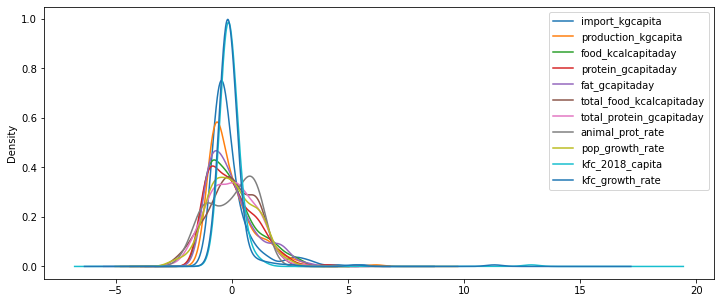

In [36]:
pd.DataFrame(X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))

Everything is ready for the clustering and PCA!

<a id='hierarchical'></a>
##  Hierarchical Clustering 
<p>

Perform hierarchical clustering to divide countries into groups according

In [37]:
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Create a hierarchical clustering model
hiercluster = AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True) 

hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled) 

In [38]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered['cluster_h'] = clusters
df['cluster_h'] = clusters

Export a CSV file containing the list of countries and the groups to which each belongs.

In [39]:
df.to_csv("list_countries.csv")

In [40]:
# Find the size of the clusters
X_scaled_clustered["cluster_h"].value_counts()

1    85
3    55
2    25
4    12
0     2
Name: cluster_h, dtype: int64

### Dendrograms

#### For Entire dataset

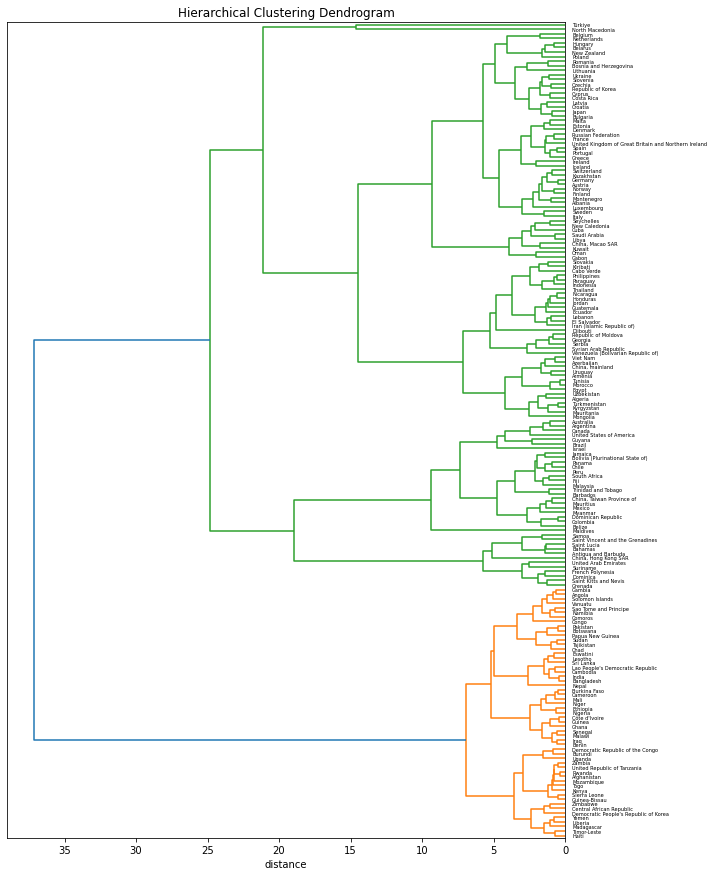

In [41]:
from scipy.cluster.hierarchy import linkage, fcluster 
sample = X_scaled_clustered
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,15))

#### Group 0

Text(0.5, 1.0, 'Dendrogram of Group 0')

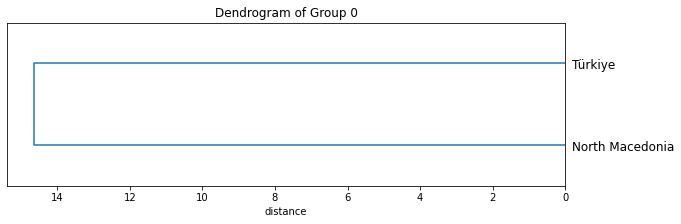

In [42]:
sample = X_scaled_clustered[X_scaled_clustered.cluster_h==0]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,3))
plt.title("Dendrogram of Group 0")

#### Group 1

Text(0.5, 1.0, 'Dendrogram of Group 1')

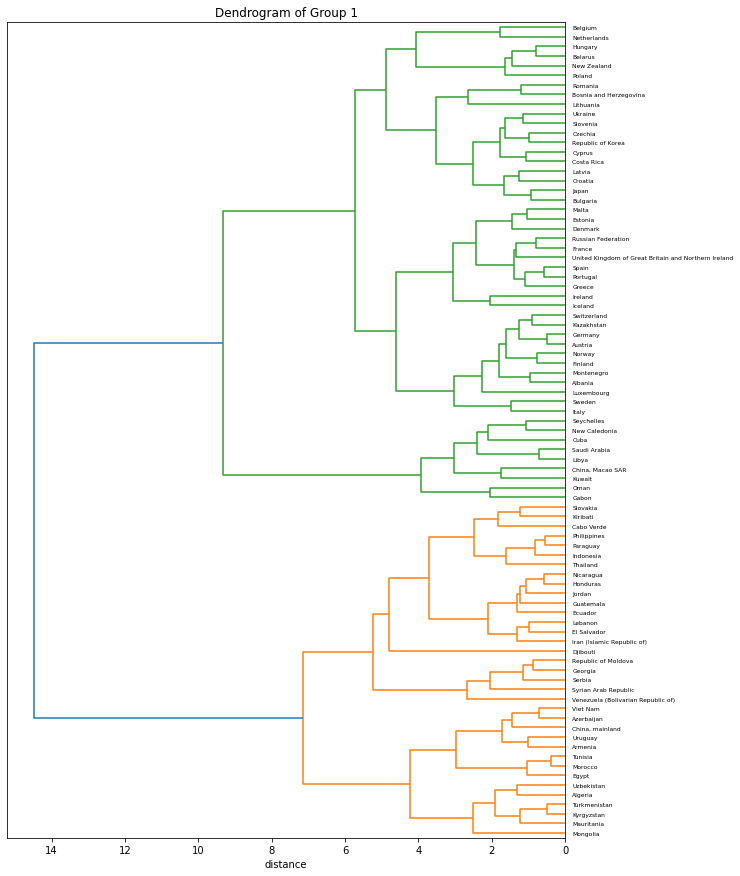

In [43]:
sample = X_scaled_clustered[X_scaled_clustered.cluster_h==1]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,15))
plt.title("Dendrogram of Group 1")

#### Group 2

Text(0.5, 1.0, 'Dendrogram of Group 2')

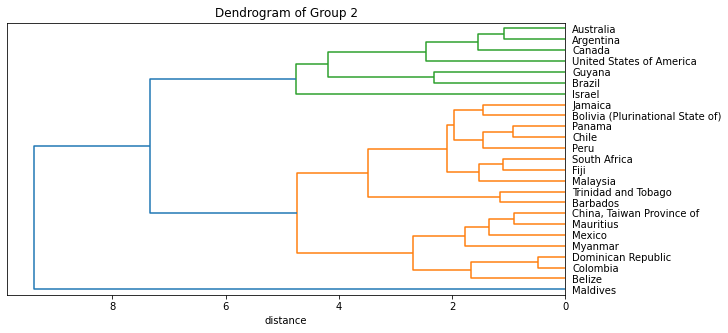

In [44]:
sample = X_scaled_clustered[X_scaled_clustered.cluster_h==2]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,5))
plt.title("Dendrogram of Group 2")

#### Group 3

Text(0.5, 1.0, 'Dendrogram of Group 3')

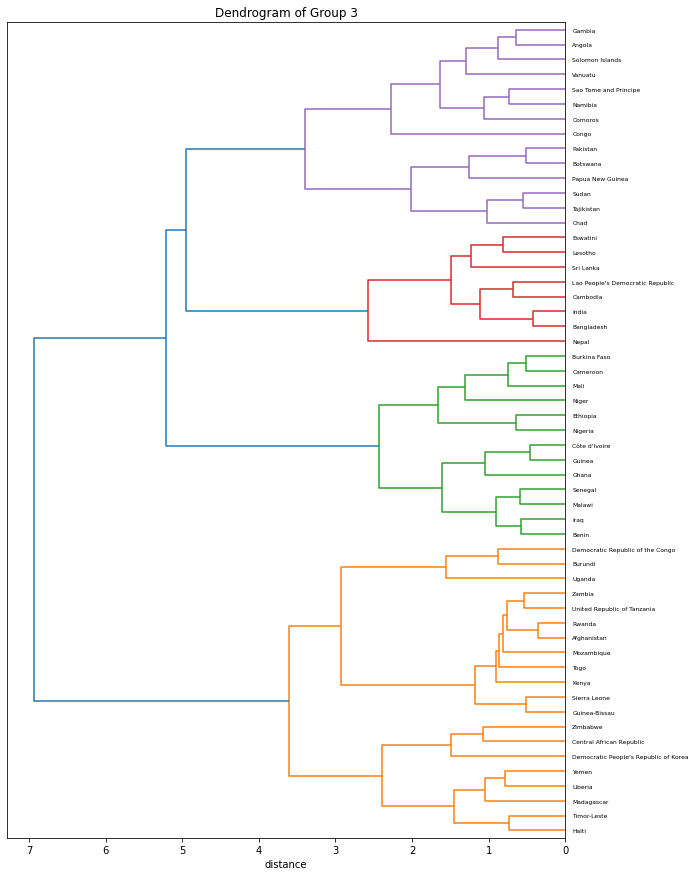

In [45]:
sample = X_scaled_clustered[X_scaled_clustered.cluster_h==3]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,15))
plt.title("Dendrogram of Group 3")

#### Group 4

Text(0.5, 1.0, 'Dendrogram of Group 4')

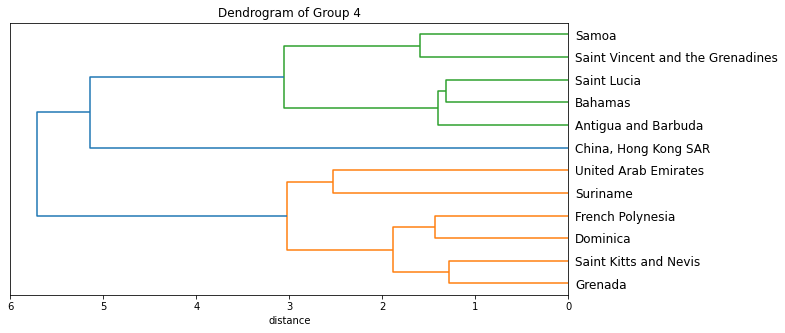

In [46]:
sample = X_scaled_clustered[X_scaled_clustered.cluster_h==4]
Z = linkage(sample, 'ward') 
names = sample.index 
plot_dendrogram(Z, names, figsize=(10,5))
plt.title("Dendrogram of Group 4")

#### Summary of the clustering result  
* Group 0: 2 countries (Turkey and North Macedonia)
* Group 1: 85 countries incl Armenia  
* Group 2: 25 countries incl Australia  
* Group 3: 55 countries incl Afghanistan  
* Group 4: 12 countries incl Samoa

### PCA

In [47]:
# Create a PCA model to reduce data to 2 dimensions for visualisation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transform the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

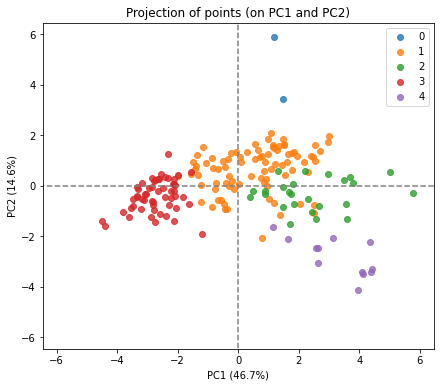

In [48]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)

PC1(46.7%) and PC2(14.6%) explain about 60% of the total data.  
* Group 0 is prominently higher in PC1  
* Group 2 and Group 3 do not differ in PC1 but are opposite in PC2  
* Group 4 is high in PC1 but low in PC2  
* Group 1 is located around the centre of both PC1 and PC2 axes and appears less distinctive  

### Correlation Circle

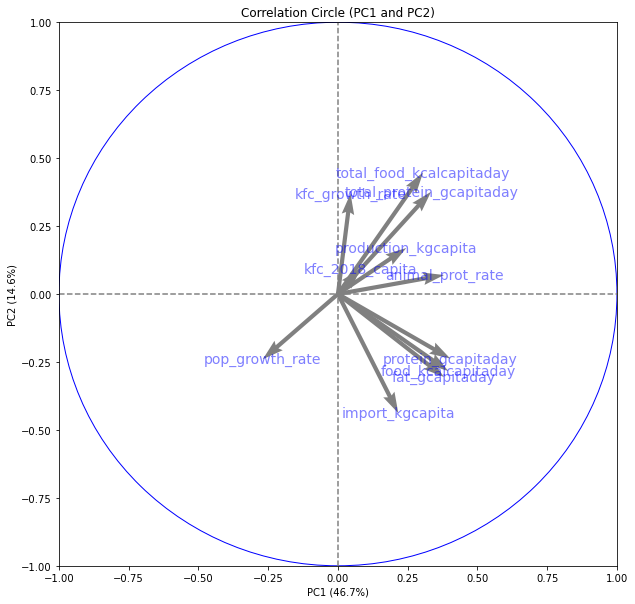

In [49]:
# Generate a correlation circle
pcs = pca.components_ 
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(X.columns),)

* Overall food energy, protein and fat intake, poultry production, percentage of animal protein, number of KFC  and its growth  are positively correlated with each other  
* The above variables are negatively correlated with the population growth rate
* Energy, protein and fat intake from poultry meat and its imports are positively correlated with each other

### Parallel Coordinates Plot

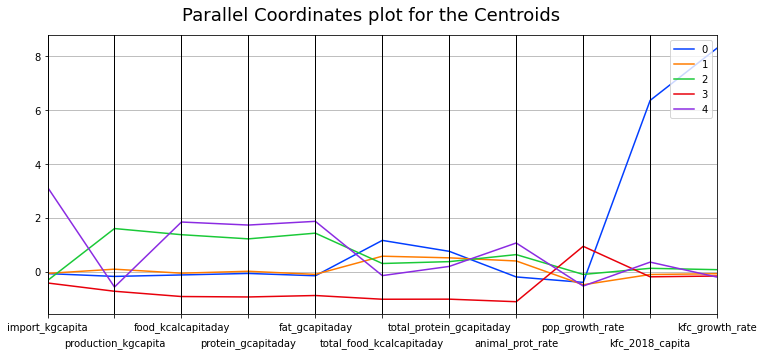

In [50]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

means = X_clustered.groupby(by="cluster").mean()
display_parallel_coordinates_centroids(means.reset_index(), 5)

Export a CSV file containing the group centroids and their coordinates in each dimension.

In [51]:
means.to_csv("centroids.csv")

##### Summary of analysis results

* Group 0 (2): Extremely high scores of KFC per capita and its growth　　
* Group 1 (85): Largest group with no significant features　　
* Group 2 (25): High levels of poultry meat intake, but also high enough domestic production and low imports　　 
* Group 3 (55): High rate of population growth, but low nutrient intake of poultry meat and food as a whole 　　
* Group 4 (12): High levels of poultry meat intake but low domestic production, dependent on imports　　

Which group can we expect as our targets?   
 ->group 0 or 4

## K-Means Clustering

We also run K-Means clustering to compare with the results of hierarchical clustering.

In [52]:
# Import the kmeans algorithm
from sklearn.cluster import KMeans

# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=5, n_init=11)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [53]:
# Add cluster number to the original data
X_scaled_clustered['cluster_k'] = clusters
df['cluster_k'] = clusters

Add the result of K-means clustering to the CSV list of countries and the groups

In [54]:
df.to_csv("P6_03_list_countries.csv")

Columns representing both hierarchical (cluster_h) and K-means clustering (cluster_k) were added to the original data.  

In [56]:
# Find the size of the clusters
X_scaled_clustered["cluster_k"].value_counts()

0    71
1    59
4    31
2    16
3     2
Name: cluster_k, dtype: int64

### PCA

In [57]:
# Create a PCA model to reduce data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [58]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

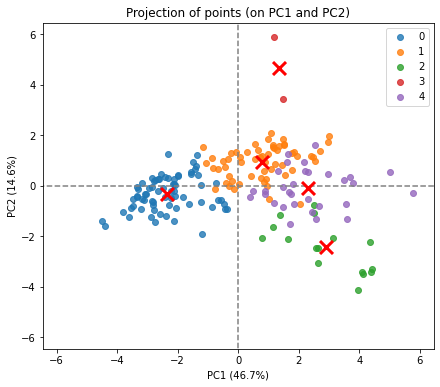

In [59]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10)

Looks very similar to the one of hierarchical clustering.  
Group 0 in hierarchical corresponds to Group 1 in K-means and Group 3 in hierarchical corresponds to Group 2 in K-means.

### Parallel Coordinates Plot

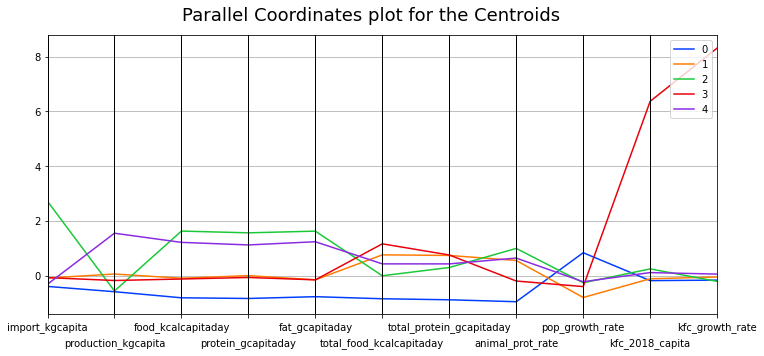

In [60]:
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

means =  X_clustered.groupby(by="cluster").mean()
display_parallel_coordinates_centroids(means.reset_index(), 5)

Also looks similar to the one of hierarchical.

### Comparision of Hierarchical and K-means

For groups 0 and 4, compare hierarchical and K-means for differences in the corresponding countries using set().  

In [61]:
X_scaled_clustered = X_scaled_clustered.reset_index()

#### Group 0 (Group 4 in K-means)

In [62]:
# Create group 0 list of hierarchical clustering
list_h =X_scaled_clustered[X_scaled_clustered['cluster_h'] == 0]['area'].tolist()
set_list_h = set(list_h)

# Create group 4 list of K-means clustering
list_k =X_scaled_clustered[X_scaled_clustered['cluster_k'] == 3]['area'].tolist()
set_list_k = set(list_k)

result_k = set_list_k - set_list_h
print(result_k)

set()


The results of hierarchical and K-means clustering are exactly the same in Group 0.

#### Group 4 (Group 0 in K-means)

In [63]:
# Create group 4 list of hierarchical clustering
list_h =X_scaled_clustered[X_scaled_clustered['cluster_h'] == 4]['area'].tolist()
set_list_h = set(list_h)

# Create group 0 list of K-means clustering
list_k =X_scaled_clustered[X_scaled_clustered['cluster_k'] == 2]['area'].tolist()
set_list_k = set(list_k)

result_k = set_list_k - set_list_h
print(result_k)

{'New Caledonia', 'China, Macao SAR', 'Gabon', 'Kuwait'}


Same countries in both hierarchical and K-means except for K-means has 4 more countries.    

### Conclusions from clustering results

In [64]:
df[(df['cluster_h'] == 0) | (df['cluster_h'] == 4)].sort_values('cluster_h')

,area_code,area,fat_gcapitaday,food_kcalcapitaday,import,production,protein_gcapitaday,country_code,total_food_kcalcapitaday,total_protein_gcapitaday,animal_prot_rate,pop_2018,pop_growth_rate,kfc_2018,kfc_growth_rate,import_kgcapita,production_kgcapita,kfc_2018_capita,cluster_h,cluster_k
110,154,North Macedonia,4.17,67.0,40.0,1.0,6.98,807,3055.0,84.22,43.956305,2083000.0,0.096108,807.0,807.000000,19.203072,0.480077,0.000387,0,3
158,223,Türkiye,4.62,72.0,6.0,2229.0,7.04,792,3744.0,110.65,35.372797,82340000.0,3.146766,142.0,1675.000000,0.072869,27.070683,0.000002,0,3
5,8,Antigua and Barbuda,18.75,249.0,7.0,0.0,18.98,028,2470.0,80.96,63.698123,96000.0,1.052632,2.0,-33.333333,72.916667,0.000000,0.000021,4,2
9,12,Bahamas,16.69,239.0,26.0,7.0,21.02,044,2650.0,81.62,65.596667,386000.0,2.116402,13.0,8.333333,67.357513,18.134715,0.000034,4,2
37,55,Dominica,13.55,181.0,4.0,0.0,14.00,212,2922.0,78.58,55.688470,72000.0,1.408451,1.0,0.000000,55.555556,0.000000,0.000014,4,2
47,70,French Polynesia,11.17,173.0,16.0,1.0,16.99,258,2894.0,96.95,66.106240,278000.0,1.090909,0.0,0.000000,57.553957,3.597122,0.000000,4,2
57,86,Grenada,13.28,184.0,7.0,1.0,15.18,308,2477.0,70.90,59.097320,111000.0,0.909091,4.0,0.000000,63.063063,9.009009,0.000036,4,2
63,96,"China, Hong Kong SAR",9.56,157.0,821.0,25.0,16.61,344,3262.0,128.30,72.977397,7372000.0,1.766980,81.0,10.958904,111.367336,3.391210,0.000011,4,2
132,188,Saint Kitts and Nevis,10.48,167.0,3.0,0.0,16.97,659,2633.0,76.41,64.769009,52000.0,0.000000,1.0,0.000000,57.692308,0.000000,0.000019,4,2
133,189,Saint Lucia,19.40,261.0,10.0,2.0,20.34,662,2637.0,92.26,64.740949,182000.0,1.111111,4.0,0.000000,54.945055,10.989011,0.000022,4,2


Groups 0 and 4 selected by hierarchical clustering were found to consist of similar countries by K-Means clustering.  
Finally we conclude that the countries in Group 0 is the group we should target.
<br>
* Group 0 Countries: Turkey and North Macedonia  
* Reasons: Extremely high scores of KFC per capita and its growth　

## Adequacy Test

### Kaiser-Meyer-Olkin (KMO) Test

Validate sample size by the Kaiser-Meyer-Olkin (KMO) Test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(X)
print(kmo_all, kmo_model)

Values of each variable is at least 0.53 and about 0.7 as the model, which indicate sample size is adequate. 

### Normality Test

Plot the distribution of all the variables and select one for the test

In [ ]:
df = pd.DataFrame(X,columns=X.columns)
df.head()

In [ ]:
fig = plt.figure(figsize=(25, 25))
for i, col in enumerate(df.columns):
    plt.subplot2grid((5, 3), (i//3, i%3))
    sns.histplot(df[col], kde=True)
    plt.title(col)

Variable 'pop_growth_rate' looks close to a normal distribution, so we run the Kolmogorov-Smirnof test using it.  
- H0: Null hypothesis, the variable follows a normal distribution  
- H1: Alternative, the variable does not follow a normal distribution  
If p value is < .05 REJECT the Null hypothesis.

In [ ]:
df['total_food_kcalcapitaday'] = (df.total_food_kcalcapitaday - np.mean(df.total_food_kcalcapitaday)) / np.std(df.total_food_kcalcapitaday)
df['total_food_kcalcapitaday'].describe().loc[['mean','std']]

In [ ]:
st.kstest(df.total_food_kcalcapitaday, 'norm') 

p value is 0.40 which is much larger than the usual 0.05 threshold so we cannot reject the null hypothesis.  
So we can conclude that the variable is normally distributed.  

### Comparison test of two populations (t-test)

Test whether there is a significant difference in the mean value of 'total_food_kcalcapitaday' for the two groups(0 and 4) 
<br>
- H0: Null hypothesis, No significant difference between the means of the two groups  
- H1: Alternative, There is a significant difference between the means of the two groups  
<br>
If p value is < .05 REJECT the Null hypothesis.

In [ ]:
group0 = X_scaled_clustered[X_scaled_clustered.cluster_h == 0].total_food_kcalcapitaday.values
group4 = X_scaled_clustered[X_scaled_clustered.cluster_h == 4].total_food_kcalcapitaday.values

result = st.ttest_ind(group0, group4)
print(result)

p-value 0.01 is  lower than the usual 0.05 threshold, so we can reject the null hypothesis.  
So we can conclude that the difference in average of total calorie intake (kcal/capitaday) between Group 0 and Group 4 is statistically significant.

## Conclusions

- Divided the country list into 5 groups by the hierarchical clustering, resulting in the selection of a target group for the following reasons:  
    - Group 0: Turkey and North Macedonia<br>
      Extremely high scores of KFC per capita and its growth　

- Results of K-means clustering were confirmed to be consistent with the above results.

- KMO test confirmed the validity of the sample size.

- Normality tests confirmed that one variable 'total_food_kcalcapitaday' (represents total calorie intake (kcal/capitaday)) in the sample was normally distributed.

- T-test proved that there is a significant difference between the two selected groups of total calorie intake.  
